## <center>Bangla Handwritten Math Solver<center> 

In [1]:
# calculate total execution time

from datetime import datetime
start_time = datetime.now()

print('Start Time: {}'.format(start_time))

Start Time: 2023-01-08 16:14:21.494208


## Importing Libraries

In [2]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from keras.models import load_model
from rembg import remove
from PIL import Image

## Loading the Dataset 

In [3]:
x = []
y = []
datadir = 'dataset'
for folder in os.listdir(datadir):
    print(folder + '....')
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

        
########## Time Calculation #################
print("\n\n### Time Update ###")
end_time = datetime.now()
print('End Time: {}'.format(end_time))
print('Duration: {}'.format(end_time - start_time))

0....
1....
2....
3....
4....
5....
6....
7....
8....
9....
add....
div....
mul....
sub....
9068
9068
labels : ['2', '0', '1', '3', '7', 'div', '8', '6', '5', '4', 'mul', '9', 'sub', 'add']


### Time Update ###
End Time: 2023-01-08 16:14:59.428347
Duration: 0:00:37.934139


## Visualizing Images in the Dataset 

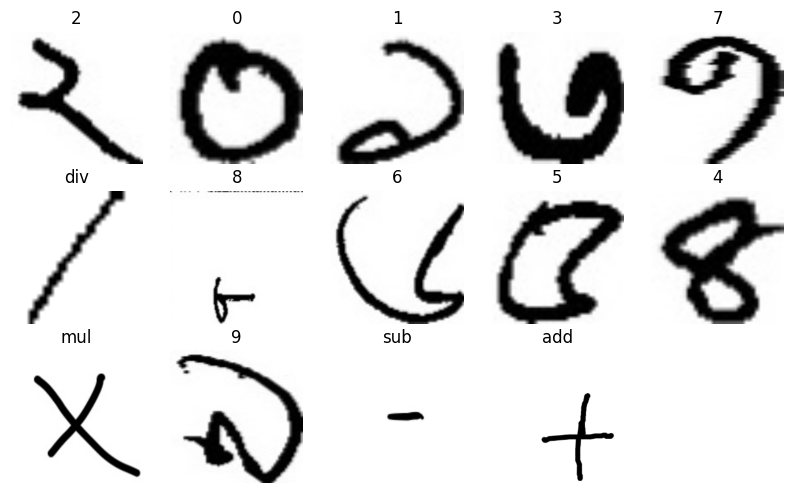

In [4]:
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

## Data Distribution of the Dataset 

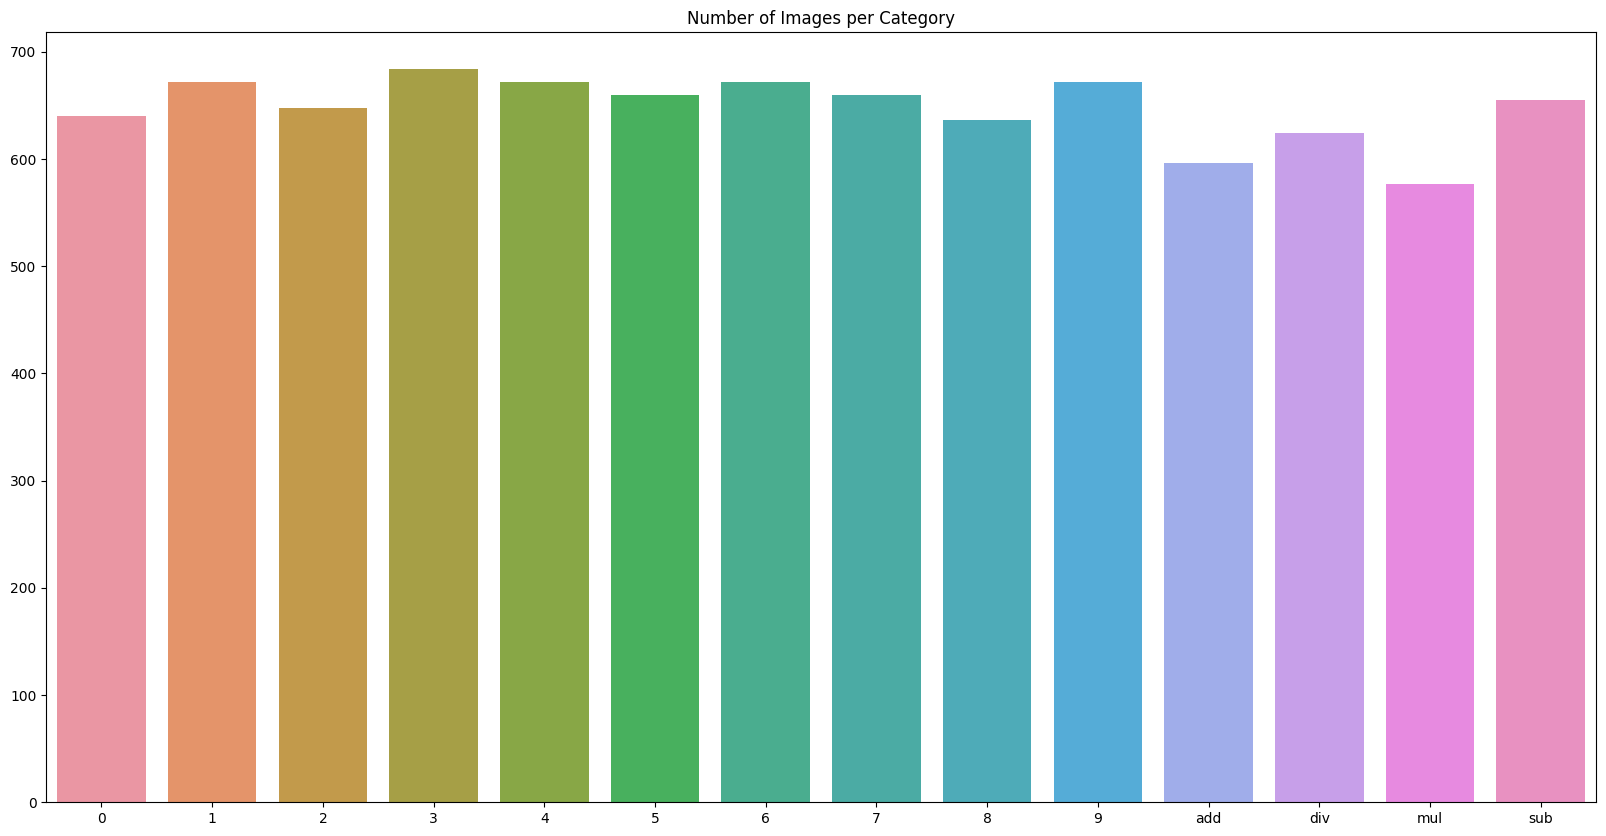

In [5]:
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sb.barplot(x=unique, y=count).set_title('Number of Images per Category')
plt.show()

In [6]:
# the dataset is not much imbalanced. So balancing is not required here much.

## Preprocessing the Data

In [7]:
X = []
for i in range(len(x)):
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))

9068


In [8]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
print(len(y))

9068


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

print(len(Y_train))
print(len(Y_test))

        
########## Time Calculation #################
print("\n\n### Time Update ###")
end_time = datetime.now()
print('End Time: {}'.format(end_time))
print('Duration: {}'.format(end_time - start_time))

7254
1814
7254
1814


### Time Update ###
End Time: 2023-01-08 16:15:00.689069
Duration: 0:00:39.194861


## Data Distribution in Train

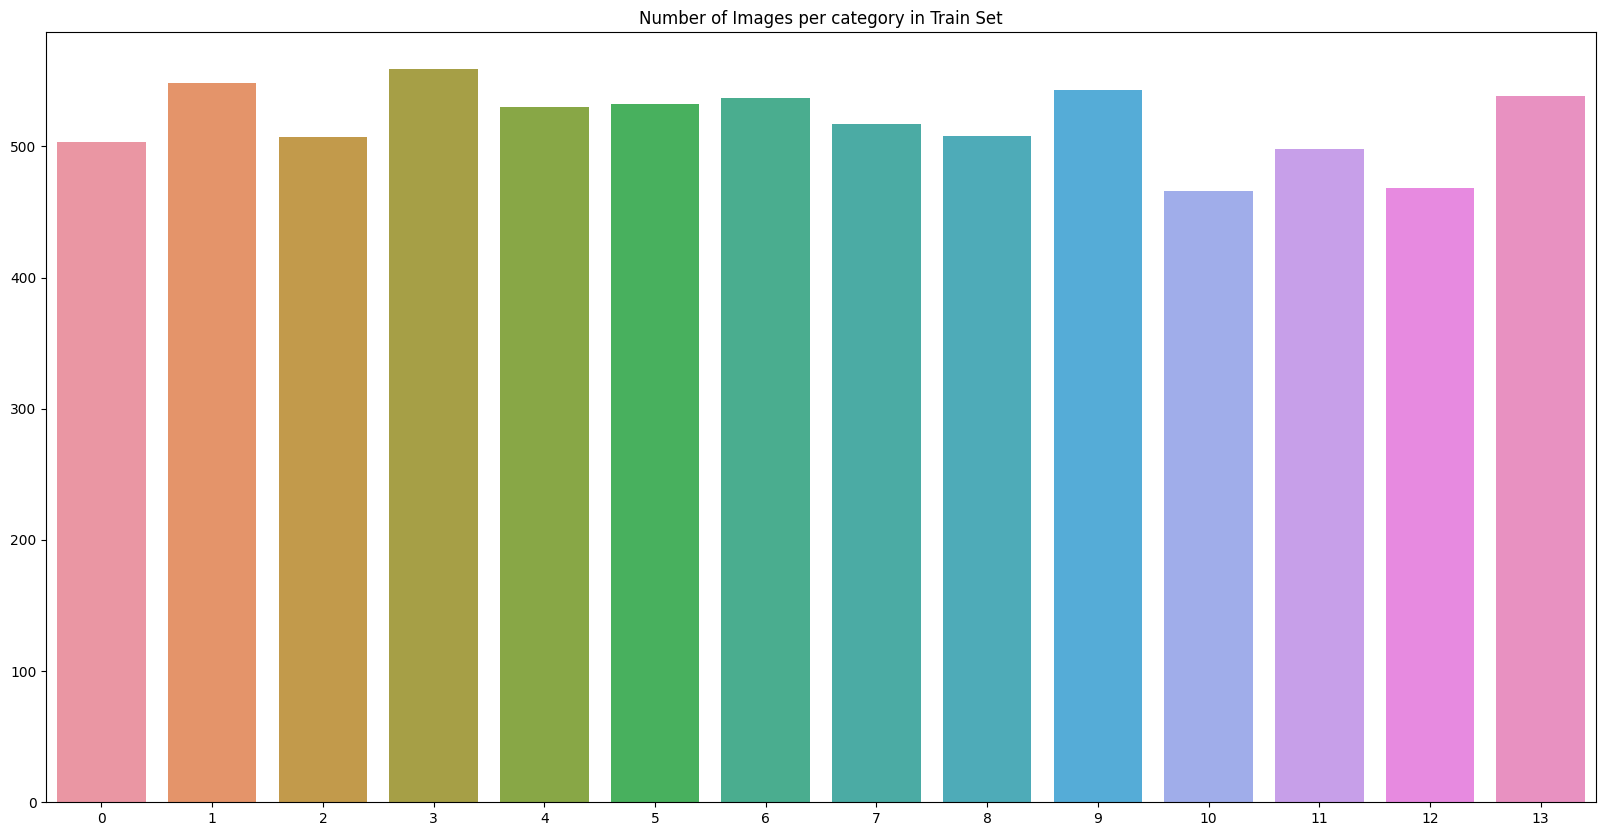

In [10]:
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sb.barplot(x=unique_train, y=count_train).set_title('Number of Images per category in Train Set')
plt.show()

## Data Distribution in Test Set

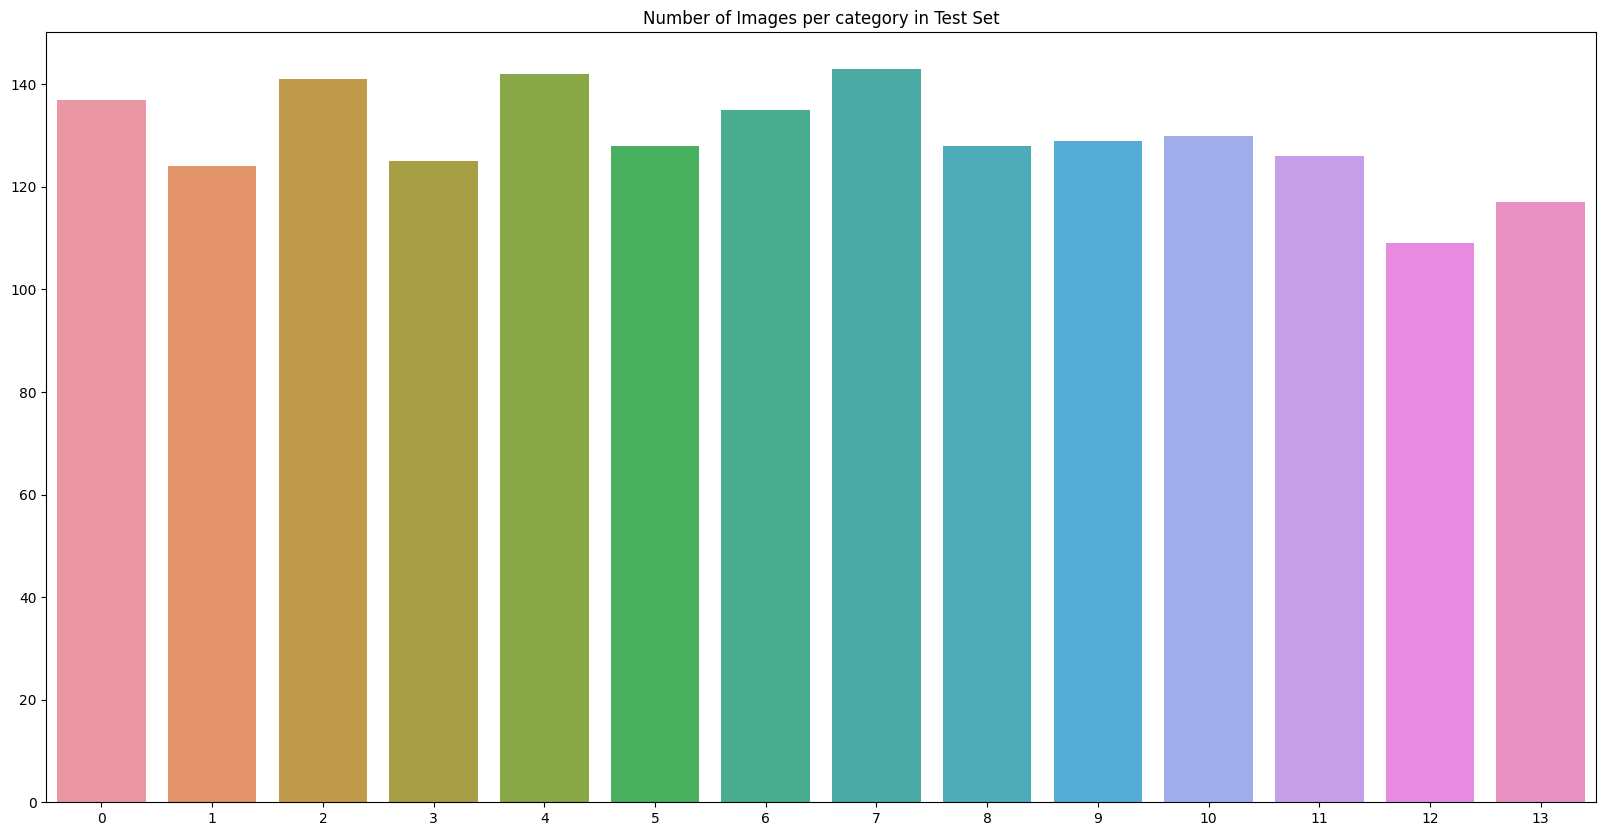

In [11]:
unique_test, count_test = np.unique(Y_test, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sb.barplot(x=unique_test, y=count_test).set_title('Number of Images per category in Test Set')
plt.show()

## Defining the Model 

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7254, 32, 32, 1)
(1814, 32, 32, 1)
(7254, 14)
(1814, 14)


In [13]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(14, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [14]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

        
########## Time Calculation #################
print("\n\n### Time Update ###")
end_time = datetime.now()
print('End Time: {}'.format(end_time))
print('Duration: {}'.format(end_time - start_time))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

##  Training the Model

In [15]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('math_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]


########## Time Calculation #################
print("\n\n### Time Update ###")
end_time = datetime.now()
print('End Time: {}'.format(end_time))
print('Duration: {}'.format(end_time - start_time))



### Time Update ###
End Time: 2023-01-08 16:15:01.493453
Duration: 0:00:39.999245


In [16]:
aug = ImageDataGenerator(zoom_range=0.1,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test, Y_test))

        
########## Time Calculation #################
print("\n\n### Time Update ###")
end_time = datetime.now()
print('End Time: {}'.format(end_time))
print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
57/57 [==============================] - 7s 114ms/step - loss: 3.0272 - accuracy: 0.3714 - val_loss: 1.7873 - val_accuracy: 0.7078
Epoch 2/100
57/57 [==============================] - 6s 107ms/step - loss: 1.2094 - accuracy: 0.7713 - val_loss: 1.0219 - val_accuracy: 0.8451
Epoch 3/100
57/57 [==============================] - 6s 108ms/step - loss: 0.8068 - accuracy: 0.8444 - val_loss: 0.8446 - val_accuracy: 0.8633
Epoch 4/100
57/57 [==============================] - 6s 107ms/step - loss: 0.6526 - accuracy: 0.8674 - val_loss: 0.7019 - val_accuracy: 0.8875
Epoch 5/100
57/57 [==============================] - 6s 108ms/step - loss: 0.5671 - accuracy: 0.8841 - val_loss: 0.6146 - val_accuracy: 0.8947
Epoch 6/100
57/57 [==============================] - 6s 109ms/step - loss: 0.5032 - accuracy: 0.8941 - val_loss: 0.5792 - val_accuracy: 0.8991
Epoch 7/100
57/57 [==============================] - 6s 108ms/step - loss: 0.4677 - accuracy: 0.8981 - val_loss: 0.5111 - val_accuracy: 0.9123

Epoch 58/100
57/57 [==============================] - 6s 106ms/step - loss: 0.1181 - accuracy: 0.9763 - val_loss: 0.1835 - val_accuracy: 0.9598
Epoch 59/100
57/57 [==============================] - 6s 106ms/step - loss: 0.1227 - accuracy: 0.9741 - val_loss: 0.1747 - val_accuracy: 0.9609
Epoch 60/100
57/57 [==============================] - 6s 104ms/step - loss: 0.1190 - accuracy: 0.9744 - val_loss: 0.1934 - val_accuracy: 0.9570
Epoch 61/100
57/57 [==============================] - 6s 109ms/step - loss: 0.1241 - accuracy: 0.9737 - val_loss: 0.2435 - val_accuracy: 0.9515
Epoch 62/100
57/57 [==============================] - 6s 105ms/step - loss: 0.1173 - accuracy: 0.9777 - val_loss: 0.1661 - val_accuracy: 0.9658
Epoch 63/100
57/57 [==============================] - 6s 105ms/step - loss: 0.1154 - accuracy: 0.9723 - val_loss: 0.1666 - val_accuracy: 0.9680
Epoch 64/100
57/57 [==============================] - 6s 106ms/step - loss: 0.1087 - accuracy: 0.9778 - val_loss: 0.1847 - val_accuracy:

##  Loss and Accuracy Plot

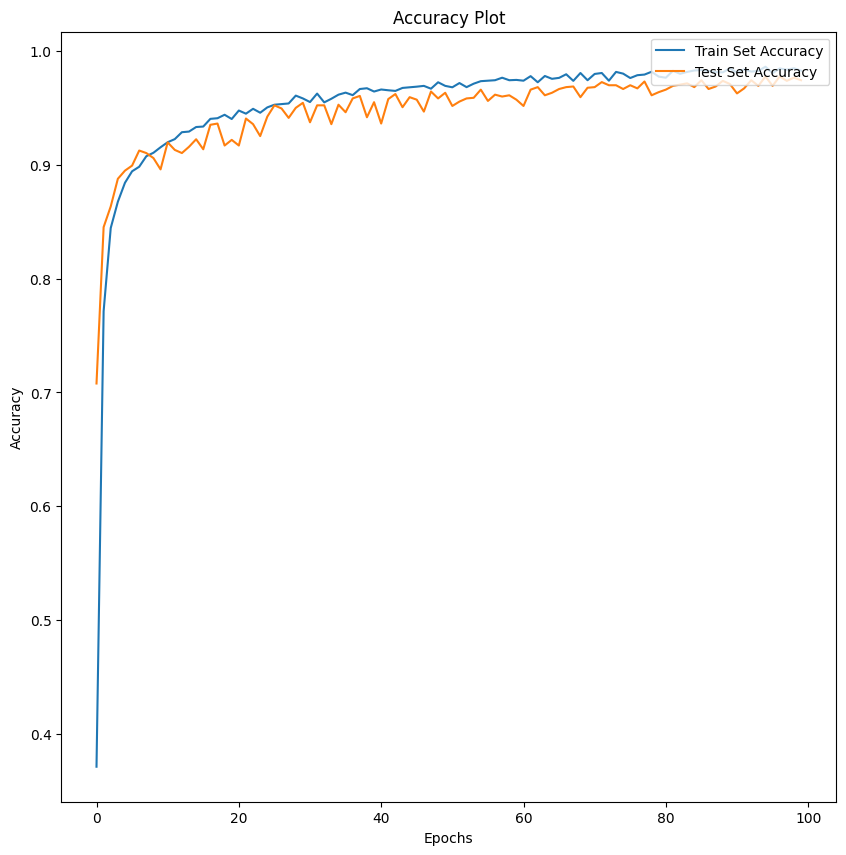

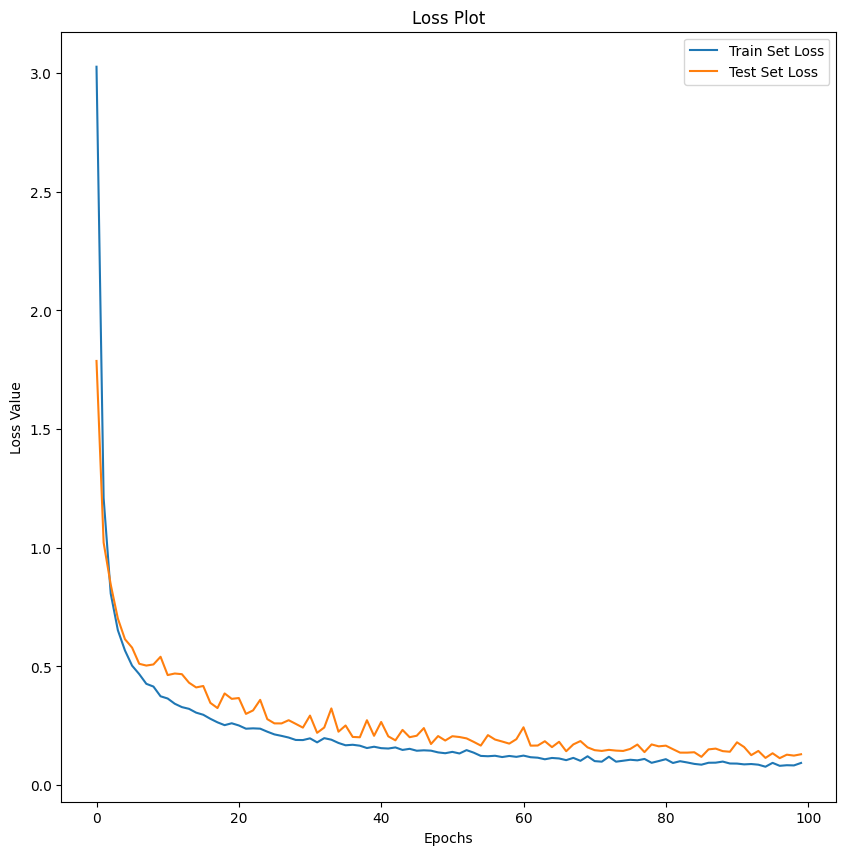

In [17]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

## Confusion Matrix 

57/57 [==============================] - 1s 7ms/step


<AxesSubplot: >

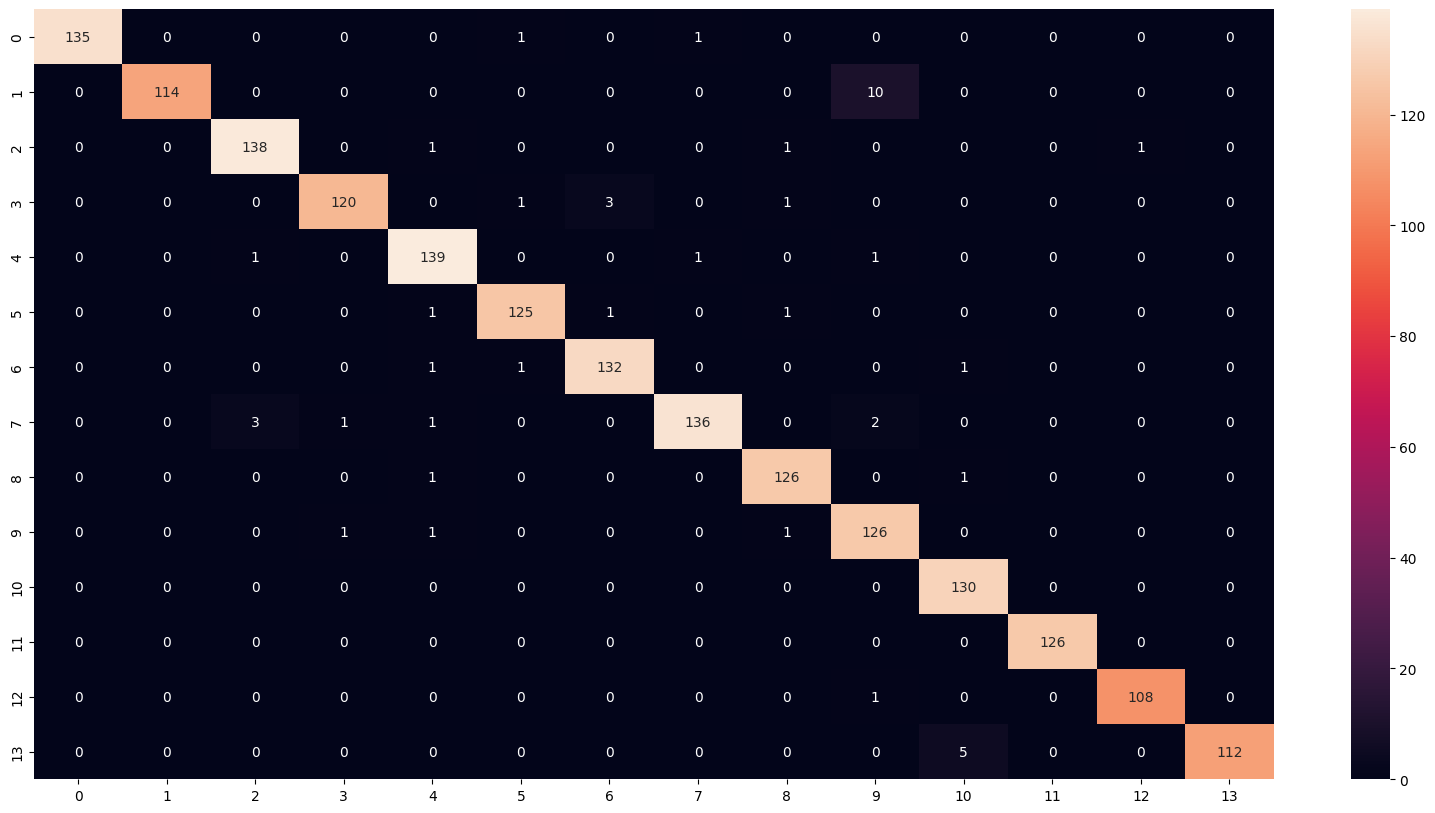

In [18]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)

matrix = confusion_matrix(Y_test_hat, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                     columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
figure = plt.figure(figsize=(20, 10))
sb.heatmap(df_cm, annot=True, fmt='d')

## Classification Report

In [19]:
print(classification_report(Y_test_hat, ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       137
           1       1.00      0.92      0.96       124
           2       0.97      0.98      0.98       141
           3       0.98      0.96      0.97       125
           4       0.96      0.98      0.97       142
           5       0.98      0.98      0.98       128
           6       0.97      0.98      0.97       135
           7       0.99      0.95      0.97       143
           8       0.97      0.98      0.98       128
           9       0.90      0.98      0.94       129
          10       0.95      1.00      0.97       130
          11       1.00      1.00      1.00       126
          12       0.99      0.99      0.99       109
          13       1.00      0.96      0.98       117

    accuracy                           0.97      1814
   macro avg       0.98      0.97      0.97      1814
weighted avg       0.97      0.97      0.97      1814



## Saving the Model 

In [20]:
model.save('math_symbol_and_digit_recognition.h5')

## Total Execution Time

In [21]:
########## Time Calculation #################
print("\n\n### Time Update ###")
end_time = datetime.now()
print('End Time: {}'.format(end_time))
print('Duration: {}'.format(end_time - start_time))



### Time Update ###
End Time: 2023-01-08 16:25:41.021401
Duration: 0:11:19.527193
